- select only the lower energy value for each xy
- plot 

In [15]:
import sys
sys.path.insert(1, '../functions')
from extract_info import final_energy
from extract_info import fermi_energy
from extract_info import band_gap
import numpy as np
from plotting import plot_es
from plotting import plot_bs
from plotting import compare_bs
from plotting import compare_es
from visualisation_tools import gui2cif
from visualisation_tools import gui2cif 
from crystal_io import read_input
from crystal_io import write_input
from crystal_io import extract_last_geom
from plotting import plot_bands
from plotting import plot_dos
from extract_info import final_energy
from geom_modification import make_supercell 
from geom_modification import insert_atom
from geom_modification import substitute_atom
from geom_modification import displace_atom
from geom_modification import remove_atom

import matplotlib.pyplot as plt

In [34]:
def sample_surface(a,b,z,n_points,shifts=1):
    #a=[1,0]
    #b=[0,1]
    import matplotlib.pyplot as plt
    step = 1./n_points
    x = np.arange(0, 1, step)
    y = np.arange(0, 1, step)
    xx, yy = np.meshgrid(x, y, sparse=False)
    index = -1
    coordinates = []
    odd = np.arange(0,2.1,0.1)
    even = np.arange(0.05,2.,0.1)
    if shifts%2 == 0:
        z_coord = even[(len(even)//2-shifts//2):(len(even)//2+shifts//2)]*z
    else:
        z_coord = odd[(len(odd)//2-shifts//2):(len(odd)//2+shifts//2)+1]*z    
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            for s in range(shifts):
                index += 1
                xx[i,j] = xx[i,j]*a[0]+yy[i,j]*b[0]
                yy[i,j] = xx[i,j]*a[1]+yy[i,j]*b[1]
                
                coordinates.append([' '.join([str(xx[i,j]),str(yy[i,j]),str(z_coord[s])])])
            print(xx[i,j],yy[i,j])
    #plt.plot(xx,yy,'*');

    return coordinates

In [42]:
a=[2.18134072539 , -1.25939765500]
b=[0.0, 2.51879531000]
a=[1,0]
b=[0,2]
z= 2.4
n_points = 5
n_shifts = 3
coordinates = sample_surface(a,b,z,n_points,n_shifts)
for i in range(len(coordinates)):
    geom_block,optgeom_block,bs_block,func_block,scf_block = read_input('../data/spin/BN_spin.d12')
    geom_block,scf_block = make_supercell(geom_block,scf_block,[3,0,0,3])        
    input_name = '../data/sample_surface/BN3x3_SA_%s_%s.d12' % (i//n_shifts,i%n_shifts)
    geom_block = insert_atom(geom_block,['29'],coordinates[i])
    write_input(input_name,geom_block,bs_block,func_block,scf_block)
    file = open('../data/sample_surface/BN3x3_SS.qsub', 'r')
    data = file.readlines()
    file.close()
    data[34] = '/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runcryP '+ input_name[5:-4]+'\n'
    data[35] = 'qsub BN3x3_SS_%s.qsub' % (str(i+1))+'\n'
    with open('../data/sample_surface/BN3x3_SS_%s.qsub'%(i), 'w') as file:
        for line in data:
            file.writelines(line)

0.0 0.0
0.2 0.0
0.4 0.0
0.6000000000000001 0.0
0.8 0.0
0.0 1.6
0.2 1.6
0.4 1.6
0.6000000000000001 1.6
0.8 1.6
0.0 3.2
0.2 3.2
0.4 3.2
0.6000000000000001 3.2
0.8 3.2
0.0 4.800000000000001
0.2 4.800000000000001
0.4 4.800000000000001
0.6000000000000001 4.800000000000001
0.8 4.800000000000001
0.0 6.4
0.2 6.4
0.4 6.4
0.6000000000000001 6.4
0.8 6.4


In [22]:
import re
position_x = []
position_y = []
shift = []
energy = []
for i in range(25):
    for j in range(3):
        with open('../data/sample_surface/BN3x3_SA_%s_%s.out' %(i,j)) as file:
            data = file.readlines()
        for n,l in enumerate(data):
            if re.match(r'^ATOMINSE',l):
                position_x = float(data[n+2].split()[1])
                position_y = float(data[n+2].split()[2])
        E_final = final_energy('../data/sample_surface/BN3x3_SA_%s_%s.out' %(i,j))
        if type(E_final) == float:
            energy.append([position_x, position_y,E_final])
energy = np.array(energy)
energy[:,2]

array([-64137.7677061 , -64137.84043364, -64137.82416247, -64137.76041202,
       -64137.81156038, -64137.81690218, -64137.770119  , -64137.81511285,
       -64137.8165193 , -64137.76006562, -64137.83221792, -64137.81345173,
       -64137.74338671, -64137.82997388, -64137.81061282, -64137.83143697,
       -64137.81715547, -64137.76125058, -64137.7652703 , -64137.81671759,
       -64137.75079357, -64137.81699081, -64137.75625886, -64137.81570908,
       -64137.81474152, -64137.74399962, -64137.81476437, -64137.8163679 ,
       -64137.83234806, -64137.75700446, -64137.83028326, -64137.82073302,
       -64137.75625933, -64137.81982471, -64137.83149959, -64137.816025  ,
       -64137.7530811 , -64137.73974786, -64137.82279985, -64137.8105435 ,
       -64137.74930731, -64137.75508438, -64137.82079301, -64137.81988517,
       -64137.81507428, -64137.81791795, -64137.7426477 , -64137.8323732 ,
       -64137.81387979, -64137.83056954, -64137.81273657])

ValueError: not enough values to unpack (expected 2, got 1)

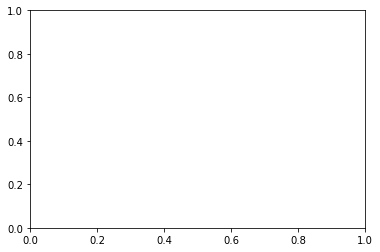

In [19]:
plt.pcolor(, energy[:,1], energy[:,2])